In [1]:
%cd ../..

/home/eli/AnacondaProjects/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch

from combinators.inference import importance, mcmc
from combinators.kernel import kernel, mh
from combinators import utils

In [3]:
import examples.ais.ais_1d_gaussians as ais_example

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
target = ais_example.AnnealingTarget(annealing_steps=10, batch_shape=(100,))

In [6]:
ais = importance.resample(mcmc.Move(target, kernel.GaussianKernel('AnnealingTarget', 'X_0', scale=1.0), moves=10, count_target=True))

In [7]:
annealed_points, trace, log_weight = ais()

In [8]:
import matplotlib.pyplot as plt
from torch.distributions import Normal

In [9]:
sample = torch.linspace(-10, 10, 100)
sample_probs = Normal(loc=torch.ones(1) * 3, scale=torch.ones(1) / 4).log_prob(sample).exp()

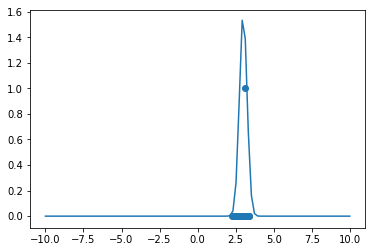

In [10]:
plt.scatter(annealed_points.detach().numpy(), log_weight.exp())
plt.plot(sample.detach().numpy(), sample_probs.detach().numpy())

In [11]:
annealed_points

tensor([2.5329, 3.1184, 2.8118, 2.9371, 2.9371, 2.9371, 2.4658, 3.3616, 2.3893,
        2.4211, 3.3616, 2.2533, 3.2478, 2.9371, 3.1184, 3.2115, 2.4658, 2.9371,
        2.5117, 2.9613, 2.6662, 2.5731, 2.6662, 2.8118, 2.9371, 2.8849, 2.4912,
        3.1184, 2.7177, 2.5731, 2.9371, 2.8849, 3.1184, 2.9613, 3.0571, 2.8171,
        2.4912, 2.9119, 2.7841, 2.9947, 3.0571, 2.8655, 2.4896, 3.0901, 2.9609,
        3.0901, 3.1184, 2.8849, 2.7248, 2.9947, 2.7969, 2.7969, 2.8171, 2.7841,
        2.5329, 2.6662, 2.8705, 2.8655, 2.6127, 2.7351, 2.4658, 2.4896, 2.5682,
        2.9119, 2.7177, 2.9609, 2.7248, 2.7351, 2.5319, 3.0571, 2.7841, 2.8705,
        2.7841, 2.4658, 3.0901, 2.6662, 2.6127, 2.8655, 2.9371, 3.1184, 3.2823,
        2.7969, 2.8171, 2.5319, 2.8849, 2.9371, 2.5319, 2.7841, 2.8171, 2.8171,
        3.1159, 2.7248, 2.7177, 3.0901, 2.7841, 2.6662, 2.5329, 2.5682, 2.5319,
        2.8118])

In [12]:
log_weight

tensor([-106.5116,  -87.8490, -106.0773,  -72.0179,  -78.5150,  -87.5756,
        -102.9056,  -87.2719,  -89.7346,  -75.8130,  -77.3310, -103.2141,
        -106.0006,  -64.0742, -104.0903, -102.7027,  -54.0096,  -91.2509,
         -98.8045, -110.2742,  -77.4608,  -25.0404,  -85.4363,  -91.3591,
         -79.9739,  -81.0725,  -74.5956,  -72.6751,  -35.6349,  -32.9022,
         -62.4375, -100.9128,  -89.2454,  -71.7911,  -60.6977, -102.3192,
         -33.8703,  -24.5469,  -14.6459, -101.5576, -105.1373,  -75.4160,
         -86.3154,  -46.8860,  -83.0803,  -69.1809,  -76.4868,  -58.0663,
         -77.9876, -108.1367, -102.3660,  -85.4291, -105.5746,  -97.6221,
         -91.7913, -101.5536, -122.2102,  -26.8166,  -95.7692, -101.0890,
         -76.7112,  -90.3307, -101.9457,  -87.0963,  -74.5946,  -74.6319,
         -60.1190,  -66.1064, -118.4123,  -88.8182,  -85.4709,  -47.9945,
         -99.9628,  -68.5634,  -95.6403, -118.1562,  -51.2510,  -78.3196,
        -106.7556,   -0.0000,  -38.593